## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation (to test the reliability of regression model)
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
train = pd.read_csv('bigmart_train.csv')

In [ ]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.isnull().sum() / train.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [ ]:
train.Item_Weight.mean()

12.857645184136183

array([[<AxesSubplot:title={'center':'Item_Weight'}>]], dtype=object)

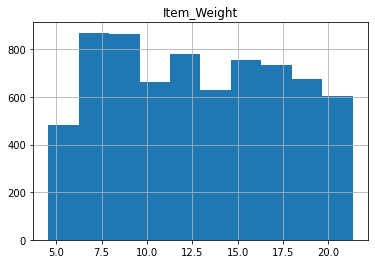

In [ ]:
train.hist('Item_Weight')

<AxesSubplot:ylabel='Density'>

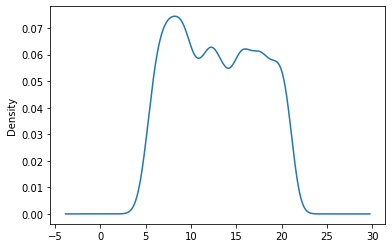

In [ ]:
train['Item_Weight'].plot(kind='kde')

In [ ]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [ ]:
train.isnull().sum()/train.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [ ]:
def fill_missing(cols):
    item_type = cols[0]
    item_weight = cols[1]
    if pd.isnull(item_weight):
        return train[train.Item_Type == item_type]['Item_Weight'].mean()
    else:
        return item_weight

In [ ]:
train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Length: 8523, dtype: float64

In [ ]:
train.Item_Weight = train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

In [ ]:
train.Item_Type.nunique()

16

In [ ]:
train.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
train.Outlet_Size.mode()[0]

'Medium'

In [ ]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['reg'], 'Regular')

In [ ]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
train['Age'] = 2021 - train.Outlet_Establishment_Year

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:>

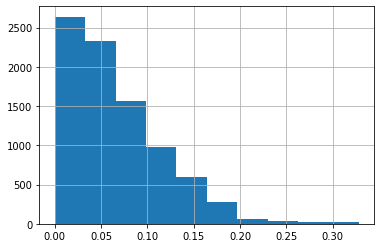

In [ ]:
train['Item_Visibility'].hist()

<AxesSubplot:>

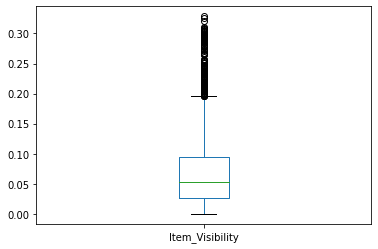

In [ ]:
train['Item_Visibility'].plot(kind='box')

In [ ]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
filt_train = train[(train.Item_Visibility >= (Q1 - 1.5*IQR)) & (train.Item_Visibility <= (Q3 + 1.5*IQR))]

In [ ]:
((train.shape[0] - filt_train.shape[0])/train.shape[0])*100

1.689545934530095

In [ ]:
train = filt_train
train.shape

(8379, 13)

In [ ]:
train['Item_Visibility'].min(), train['Item_Visibility'].max()

(0.0, 0.195721125)

In [ ]:
#creating a category
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], # Creating bins for visibility
                                       labels=['Low Viz', 'Viz', 'High Viz'], include_lowest=True)   # need to specify columns, bins and labels

In [ ]:
train['Item_Visibility_bins']

0        Low Viz
1        Low Viz
2        Low Viz
3        Low Viz
4        Low Viz
          ...   
8518     Low Viz
8519     Low Viz
8520     Low Viz
8521    High Viz
8522     Low Viz
Name: Item_Visibility_bins, Length: 8379, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [ ]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

In [ ]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', \
                               'Outlet_Type', 'Item_Visibility_bins'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [ ]:
cols_to_drop = ['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 
                'Outlet_Establishment_Year']

In [ ]:
final_train = train.drop(cols_to_drop, axis=1)

In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier 1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8379 non-null   uint8  
 12  Outlet_Type_Grocery Store      8379 non-null   u

In [ ]:
final_train

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.300,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

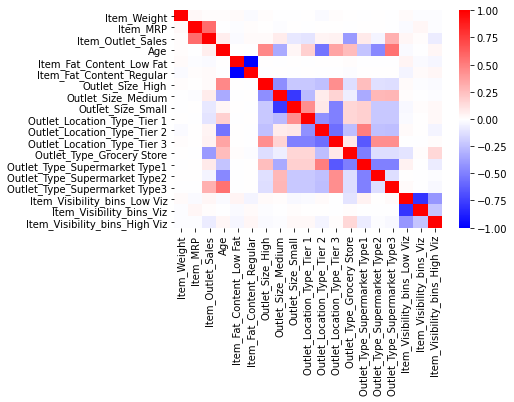

In [ ]:
import seaborn as sns

correlation = final_train.corr()

sns.heatmap(correlation, cmap='bwr')

In [ ]:
X = final_train.drop('Item_Outlet_Sales', axis=1)
y = final_train['Item_Outlet_Sales']

In [ ]:
X.shape, y.shape

((8379, 18), (8379,))

In [ ]:
dc = dict()
for i in list(final_train.columns):
    dc[i] = i.replace(' ','_')

In [ ]:
train_new = final_train.rename(dc, axis=1)

In [ ]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula=formula, data=train_new).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     813.9
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:01:26   Log-Likelihood:                -70808.
No. Observations:                8379   AIC:                         1.416e+05
Df Residuals:                    8365   BIC:                         1.417e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       463.5580    131.140      3.535      0.000     206.492     720.624
Item_Weight                      -0.8289      2.921     -0.284      0.777      -6.554       4.896
Item_MRP                         15.7924      0.199     79.374      0.000      15.402      16.182
Age                             -40.0510     10.260     -3.904      0.000     -60.162     -19.940
Item_Fat_Content_Low_Fat        207.3178     66.819      3.103      0.002      76.336     338.300
Item_Fat_Content_Regular        256.2402     66.864      3.832      0.000     125.169     387.311
Outlet_Size_High                765.7665    210.642      3.635      0.000     352.855    1178.678
Outlet_Size_Medium             -188.9023     48.143     -3.924      0.000    -283.275     -94.529
Outlet_Size_Small              -113.3062     46.830     -2.420      0.016    -205.104     -21.508
Outlet_Location_Type_Tier_1     395.6883    110.305      3.587      0.000     179.463     611.914
Outlet_Location_Type_Tier_2     166.0173     57.719      2.876      0.004      52.873     279.161
Outlet_Location_Type_Tier_3     -98.1476     52.328     -1.876      0.061    -200.724       4.429
Outlet_Type_Grocery_Store     -1520.2524     67.563    -22.501      0.000   -1652.693   -1387.812
Outlet_Type_Supermarket_Type1   -79.0225     85.114     -0.928      0.353    -245.866      87.821
Outlet_Type_Supermarket_Type2  -313.1069     70.593     -4.435      0.000    -451.487    -174.727
Outlet_Type_Supermarket_Type3  2375.9398    197.568     12.026      0.000    1988.657    2763.222
Item_Visibility_bins_Low_Viz    164.8234     47.147      3.496      0.000      72.404     257.243
Item_Visibility_bins_Viz        162.1705     48.075      3.373      0.001      67.932     256.409
Item_Visibility_bins_High_Viz   136.5641     51.883      2.632      0.008      34.861     238.267
==============================================================================
Omnibus:                      909.825   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.563
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     2.05e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.3)

In [ ]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((5865, 18), (2514, 18), (5865,), (2514,))

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(trainX, trainY)

LinearRegression()

In [ ]:
lm.score(trainX, trainY)

0.5490109193237103

In [ ]:
lm.score(testX, testY)

0.5797190369592693

In [ ]:
lm.intercept_

1501.6174695370773

In [ ]:
lm.coef_

array([-1.26386909e+00,  1.58582180e+01, -4.55796094e+01, -4.27133913e+01,
        4.27133913e+01,  7.45949091e+02, -4.07867259e+02, -3.38081832e+02,
        2.83293974e+02,  4.38825794e+01, -3.27176553e+02, -1.60899531e+03,
       -2.77146210e+02, -4.83317461e+02,  2.36945898e+03, -7.56736734e+00,
        1.19992309e+01, -4.43186360e+00])

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Age', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Visibility_bins_Low Viz', 'Item_Visibility_bins_Viz',
       'Item_Visibility_bins_High Viz'],
      dtype='object')

In [ ]:
predicted_y = lm.predict(testX)

In [ ]:
predicted_y

array([3409.06435639, 4252.3967275 , 1711.23132816, ..., 2981.7654198 ,
       1696.07809261, 2254.18383437])

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge = Ridge(alpha=0.01)

In [ ]:
ridge.fit(trainX, trainY)

Ridge(alpha=0.01)

In [ ]:
ridge.score(trainX, trainY)

0.5571868096780206

In [ ]:
ridge.score(testX, testY)

0.560462347885149

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [ ]:
gscv = GridSearchCV(ridge, param_grid=parameters, cv=3)

In [ ]:
gscv.fit(trainX, trainY)

GridSearchCV(cv=3, estimator=Ridge(alpha=0.05),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [ ]:
gscv.best_params_['alpha']

0.01

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(trainX, trainY)

Lasso(alpha=0.01)

In [ ]:
lasso.score(trainX, trainY)

0.5571867387343152

In [ ]:
lasso.score(testX, testY)

0.560472611681621

In [ ]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [ ]:
gscv = GridSearchCV(lasso, param_grid=parameters, cv=3)

In [ ]:
gscv.fit(trainX, trainY)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373592944.39467764, tolerance: 1144430.0206604719
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388110896.1201143, tolerance: 1166503.9834491448
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390469003.6438403, tolerance: 1147149.6900253918
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

GridSearchCV(cv=3, estimator=Lasso(alpha=0.01),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [ ]:
gscv.best_params_['alpha']

0.01